# Bag Pack Prediction
**Author: Kamau Wa Wainaina**

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')

In [3]:
path = "../../../Data/playground-series-s5e2/"
train = pd.read_csv(path+"train.csv")
test = pd.read_csv(path+"test.csv")

## EDA

In [5]:
train.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


In [7]:
# Explicitly make id the index.
train = train.set_index("id")

In [8]:
train.describe()

,Compartments,Weight Capacity (kg),Price
count,300000.000000,299862.000000,300000.000000
mean,5.443590,18.029994,81.411107
std,2.890766,6.966914,39.039340
min,1.000000,5.000000,15.000000
25%,3.000000,12.097867,47.384620
50%,5.000000,18.068614,80.956120
75%,8.000000,24.002375,115.018160
max,10.000000,30.000000,150.000000


In [9]:
train.describe(include="O")

,Brand,Material,Size,Laptop Compartment,Waterproof,Style,Color
count,290295,291653,293405,292556,292950,292030,290050
unique,5,4,3,2,2,3,6
top,Adidas,Polyester,Medium,Yes,Yes,Messenger,Pink
freq,60077,79630,101906,148342,148077,100031,51690


In [10]:
# Let's create a function to calculate percentage of missing values across the columns.
def missing_percent(df):
    tot_rows = len(df)
    arr = []
    
    for col in df.columns:
        count_null = df[col].isnull().sum()
        percent_null = np.round((count_null/tot_rows)*100, 2)
        arr.append([col, percent_null])
    
    arr.sort(key=lambda x: x[1])
    
    return pd.DataFrame(arr, 
                        columns=["Columns", "Missing Percent"])

In [11]:
missing_percent(train)

,Columns,Missing Percent
0,Compartments,0.00
1,Price,0.00
2,Weight Capacity (kg),0.05
3,Size,2.20
4,Waterproof,2.35
5,Laptop Compartment,2.48
6,Style,2.66
7,Material,2.78
8,Brand,3.24
9,Color,3.32


### Data Cleaning.
- Performing some data cleaning have clean plots.

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(train)
X = imputer.transform(train)
train_tr = pd.DataFrame(X, 
                        index=train.index, 
                        columns=train.columns)

In [14]:
missing_percent(train_tr)

,Columns,Missing Percent
0,Brand,0.0
1,Material,0.0
2,Size,0.0
3,Compartments,0.0
4,Laptop Compartment,0.0
5,Waterproof,0.0
6,Style,0.0
7,Color,0.0
8,Weight Capacity (kg),0.0
9,Price,0.0


### Visualizations

In [16]:
num_columns = ["Compartments", "Weight Capacity (kg)", "Price"]
cat_columns = ["Brand", "Material", "Size", "Laptop Compartment", "Waterproof", "Style", "Color"]

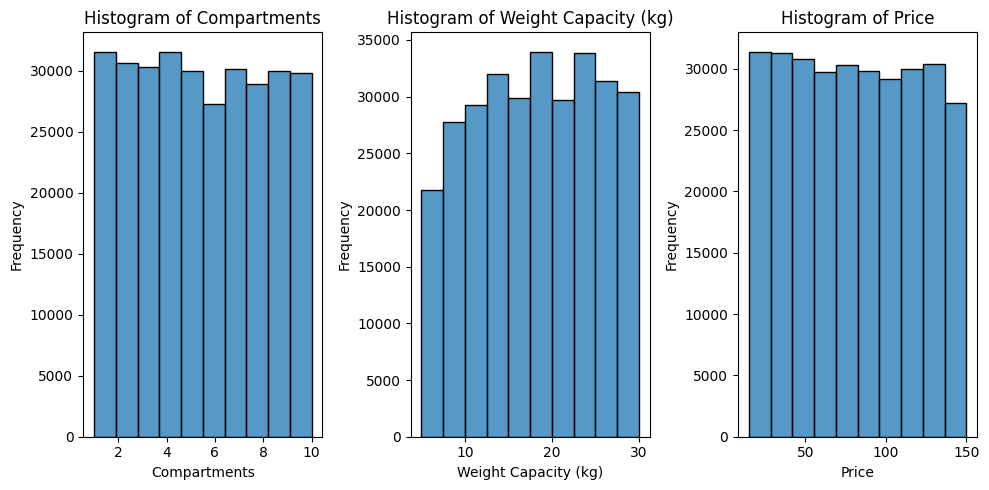

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
for i, col in enumerate(num_columns):
    sns.histplot(train_tr[col],
                 bins=10,
                 ax=ax[i])
    ax[i].set_ylabel("Frequency")
    ax[i].set_title(f"Histogram of {col}")
plt.tight_layout()

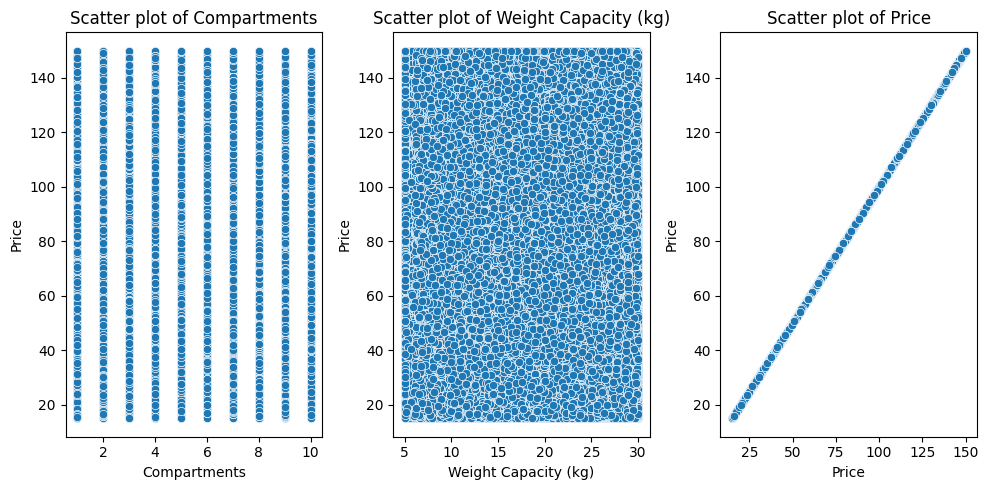

In [54]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
for i, col in enumerate(num_columns):
    sns.scatterplot(x=col, 
                    y="Price", 
                    data=train_tr,
                    ax=ax[i])
    ax[i].set_title(f"Scatter plot of {col}")
plt.tight_layout()

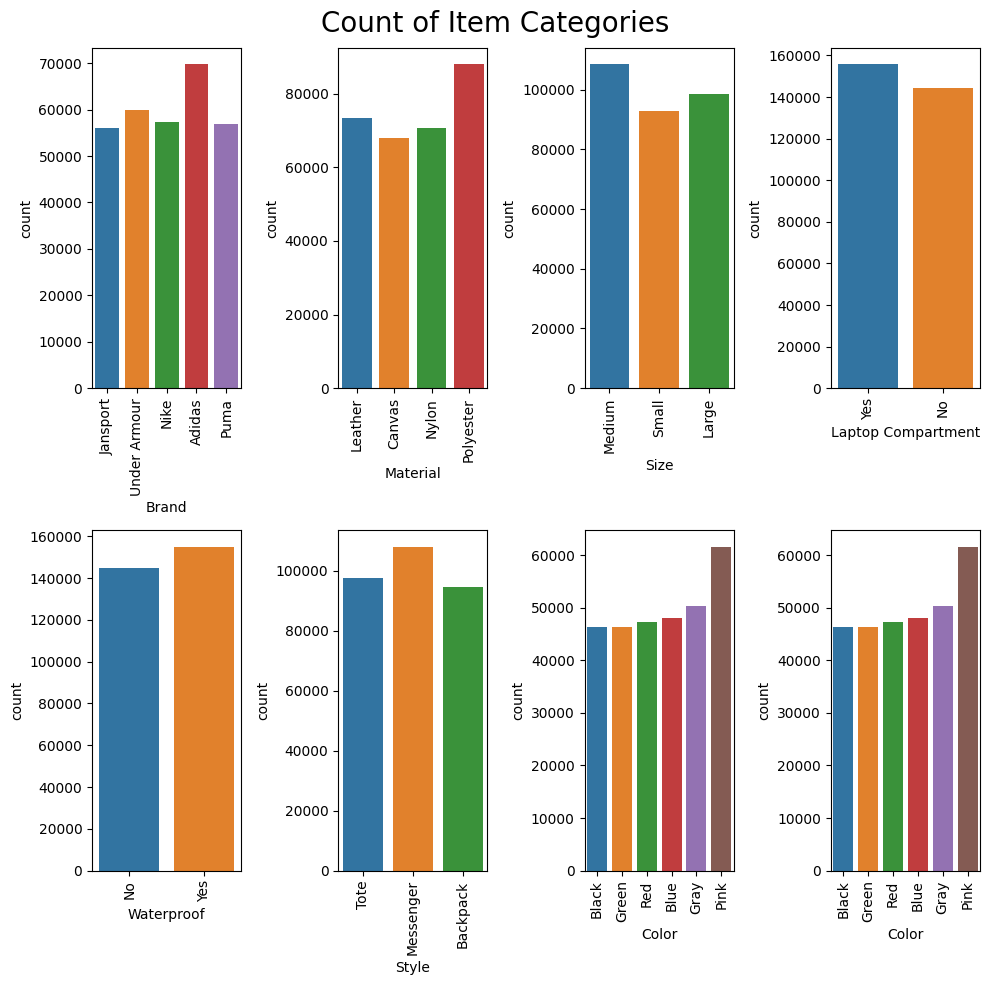

In [95]:
fig, ax = plt.subplots(2, 4, figsize=(10, 10))
cat_i = 0
for i in range(2):
    for j in range(4):
        sns.countplot(x=cat_columns[cat_i], 
                      data=train_tr, ax=ax[i,j])
        ax[i,j].tick_params(axis="x", 
                            rotation=90)
        if cat_i < 6:
            cat_i += 1
fig.suptitle("Count of Item Categories", 
             size=20)
plt.tight_layout()